# FE Homework 1
**FBA Quant 이의형**

---

## Problem 1.  
An investor deposits $15,000 in a bank today at 6% annual interest.  
Assuming that no additional deposits are made, and that no money is withdrawn, how large will the account balance be 23 years from today if  
- (a) the interest is computed using the simple interest convention?  
- (b) the interest is compounded annually?  
- (c) the interest is compounded quarterly?  
- (d) the interest is compounded monthly?  
- (e) the interest is compounded continuously?  

(You should assume that the 6% annual interest rate applies to deposits of any length.)

In [1]:
import numpy as np

money = 15000
r = 0.06
year = 23

# (a)
simple_interest = money * (1 + (r * year))
print(f"(a) ${simple_interest:.2f}")

# (b)
cum_annually = money * (1 + r)**year
print(f"(b) ${cum_annually:.2f}")

# (c)
cum_quarterly = money * (1 + r/4)**(year*4)
print(f"(c) ${cum_quarterly:.2f}")

# (d)
cum_monthly = money * (1 + r/12)**(year*12)
print(f"(d) ${cum_monthly:.2f}")

# (e)
cum_continuously = money * np.exp(year*r)
print(f"(e) ${cum_continuously:.2f}")

(a) $35700.00
(b) $57296.24
(c) $59015.64
(d) $59418.86
(e) $59623.52


---

## Problem 2. 
If you buy a lottery ticket in 50 lotteries, in each of which your chances of winning a prize of 1/100, what is the probability that you will win a prize:  
- (a) at least once?
- (b) exactly twice?
- (c) at least twice?  

Calculate both the exact probabilities (using the binomial distribution) and the approximate probabilities (using the Poisson distribution).

In [2]:
import math
import numpy

trial = 50
prob = 1/100

def binomial_p(n, p, x):
    return (math.factorial(n)/(math.factorial(x)*math.factorial(n-x))) * (p**x) * ((1-p)**(n-x))

def poisson_p(lambda_p, T, x):
    alpha_p = lambda_p * T
    return (alpha_p**x) * np.exp(-alpha_p) / math.factorial(x)


# (a)
at_least_once_bi = 1 - binomial_p(trial, prob, 0)
at_least_once_po = 1 - poisson_p(prob, trial, 0)
print(f'(a) binomial : {at_least_once_bi:.4f}')
print(f'    poisson : {at_least_once_po:.4f}')

# (b)
exactly_twice_bi = binomial_p(trial, prob, 2)
exactly_twice_po = poisson_p(prob, trial, 2)
print(f'(b) binomial : {exactly_twice_bi:.4f}')
print(f'    poisson : {exactly_twice_po:.4f}')

# (c)
at_least_twice_bi = 1 - binomial_p(trial, prob, 0) - binomial_p(trial, prob, 1)
at_least_twice_po = 1 - poisson_p(prob, trial, 0) - poisson_p(prob, trial, 1)
print(f'(c) binomial : {at_least_twice_bi:.4f}')
print(f'    poisson : {at_least_twice_po:.4f}')

(a) binomial : 0.3950
    poisson : 0.3935
(b) binomial : 0.0756
    poisson : 0.0758
(c) binomial : 0.0894
    poisson : 0.0902


---

## Problem 3.
Consider the following situation:
  
### $Y \sim N(\mu,\sigma^2)$  
### $(X | Y = y) \sim N(y,v^2)$
  
We want to find the distribution of $𝑋$.  

- (a) Find $f_{XY}(x,y)$ and then use a Law of Total Probability to determine the distribution of $X$
### $f_X(x) = \int f_{x|y}(x|y)f_Y(y)\mathrm{d}y$  
　  
   
- (b) Find the MGF $M_X(t)$ and determine the distribution of $X$  
### $M_X(t) = E(e^{tX}) = E[E(e^{tX}|Y)]$
where the “inner” expected value, $E(e^{tX}|Y)$ is the moment generating function of the
random variable $X||Y = y$

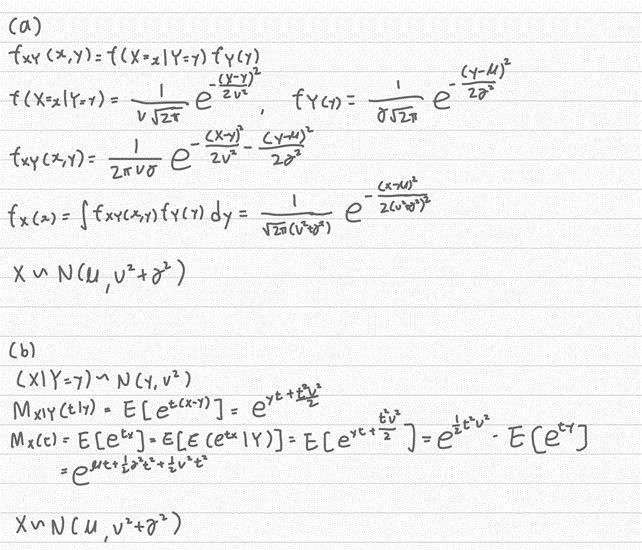

---

## Problem 4.
Many people believe that the daily change of price of a company’s stock on the stock market is a random variable with mean 0 and variance $\sigma^2$. That is, if $S_t$ represents the price of the stock on the $t$-th day, then
### $S_t = S_{t-1}+W_t,　t\ge1$
  
where $W_1,W_2,...,$ are independent and identically distributed random variables with mean 0 and variance $\sigma^2$.  
Suppose that the stock's price today is 100 and $\sigma^2 = 1$.  
- (a) What can you say about the probability that the stock’s price will exceed 105 after 10 days? (Hint: Chebyshev inequality)
- (b) Suppose $W_1,W_2,...,$ are independent and identically distributed Normal random variables with mean 0 and variance $\sigma^2$. What is the probability that the stock’s price will exceed 105 after 10 days?
- (c) Simulate $M=10000$ trajectories of the stock price $S_t$ for $t=0,1,...,10$. Plot 10 pairs of trajectories of the stock and calculate the probability that the stock's price exceeds 105 after 10 days.

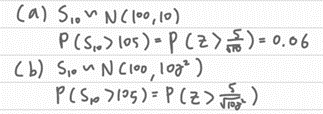

In [62]:
# (c)

import pandas as pd
import numpy as np

rets = pd.DataFrame(np.random.normal(size=(10, 10000)))
prices = 100*((1+rets/100)).cumprod()

(prices.loc[9,:] > 105).sum() / 10000

0.0571

---

## Problem 5. 
The IRR is generally calculated using an iterative procedure. Suppose that we define $f(\lambda) = -a_0+a_1\lambda +a_2\lambda^2+...+a_n\lambda^2$, where all $a_i$ are positive and $n > 1$. Here is an iterative technique that generates a sequence $\lambda_0, \lambda_1, \lambda_2, ..., \lambda_k, ...$ of estimates that converges to the $\bar\lambda > 0$, solving $f(\bar\lambda) = 0$. Start with any $\lambda_0 > 0$ close to the solution. Assuming $\lambda_k$ has been calculated, evaluate  
### $f'(\lambda_k) = a_1+2a_2\lambda_k+3a_3\lambda_k^2+ ... + na_n\lambda_k^{n-1}$ 
and define  
### $\lambda_{k+1} = \lambda_k - \frac{f(\lambda)}{f'(\lambda)}$
Try the procedure on $f(\lambda) = -1 + \lambda + \lambda^2$ starting with $\lambda_0 = 1$.  
- (a) Write a Python function to calculate $\bar\lambda$ accurate up to 0.000001 and compute the computation time
- (b) Use the Bisection method to calculate $\bar\lambda$ accurate up to 0.000001 and compare the computation time with the result from (a)

In [3]:
# (a)

import time

start_time = time.time()

def find_lambda_newton(x):
    y = -1 + x + x**2
    if abs(y) < 0.000001:
        return x
    dy = 1 + 2*x
    return find_lambda_newton_newton(x - (y/dy))

lambda_newton = find_lambda_newton(1)
print(f'Lambda : {lambda_newton}')

end_time = time.time()
computation_time_newton = end_time - start_time
print(f'computation time : {computation_time_newton:.9f}초')

Lambda : 0.618033988749989
computation time : 0.000000000초


In [4]:
# (b)

start_time = time.time()

def find_lambda_bisection(x):
    y = 1
    start = 0
    end = x
    while abs(y) > 0.000001:
        mid = (start + end) / 2
        y = -1 + mid + mid**2
        if y < 0:
            start = mid
        elif y > 0:
            end = mid
    return mid

lambda_bisection = find_lambda_bisection(1)
print(f'Lambda : {lambda_bisection}')

end_time = time.time()
computation_time_bisection = end_time - start_time
print(f'computation time : {computation_time_bisection:.9f}초')

Lambda : 0.6180343627929688
computation time : 0.000000000초


In [5]:
# 비교

import pandas as pd

comparison = pd.DataFrame(columns = ['Newton', 'Bisection'])

for i in range(1000000):
    start_time = time.time()
    find_lambda_newton(1)
    end_time = time.time()
    newton_time = end_time - start_time
    
    start_time = time.time()
    find_lambda_bisection(1)
    end_time = time.time()
    bisection_time = end_time - start_time
    
    comparison = comparison.append({'Newton':newton_time, 'Bisection':bisection_time}, ignore_index=True)


print(f'Newton 100만회 총 작동시간 : {comparison["Newton"].sum()}')
print(f'Bisection 100만회 총 작동시간 : {comparison["Bisection"].sum()}')

Newton 100만회 총 작동시간 : 12.010895490646362
Bisection 100만회 총 작동시간 : 11.578346729278564


너무 미세한 차이라 빠르다고 하기 애매한 것 같습니다.

---

## Problem 6. 
Given N points drawn randomly on the circumference of a circle, what is the probability that they are all within a semicircle?

### Answer :  
어떤 한 점이 원의 둘레 위에 있을 때, 다른 점이 그 점을 포함한 반원의 둘레에 있을 확률은 $\frac{반원의 길이}{원의 길이} = \frac{1}{2}$ 이다.  

따라서 N개의 점이 있다고 했을 때, N-1개의 점이 어떤 한 점을 포함하는 반원 내에 있어야하고,  
각 점마다 상호배타적이기 때문에 경우의 수는 N만큼 존재한다. 즉, 확률은 아래와 같다.

### $$N*(\frac{1}{2})^{N - 1}$$

---